In [1]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
# import PyDynamic as pd

#### Функции

In [2]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, logx = False, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    if (logx):
        ax[0].semilogx(w, fr, 'b')
    else:
        ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, рад/с')
    ax[0].grid(True)

    if (logx):
        ax[1].semilogx(w, pr, 'g')
    else:
        ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, рад/с')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

# Оболочка для отрисовки графика при вызове функций freqs и freqz в линейном масштабе
def FRPRDiag (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=False)

# Оболочка для отрисовки графика при вызове функций freqs и freqz в логарифмическом масштабе
def FRPRDiagLog (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=True)


#### Дискретизация аналоговых фильтров при помощи билинейного преобразования

##### Эллиптический фильтр нижних частот

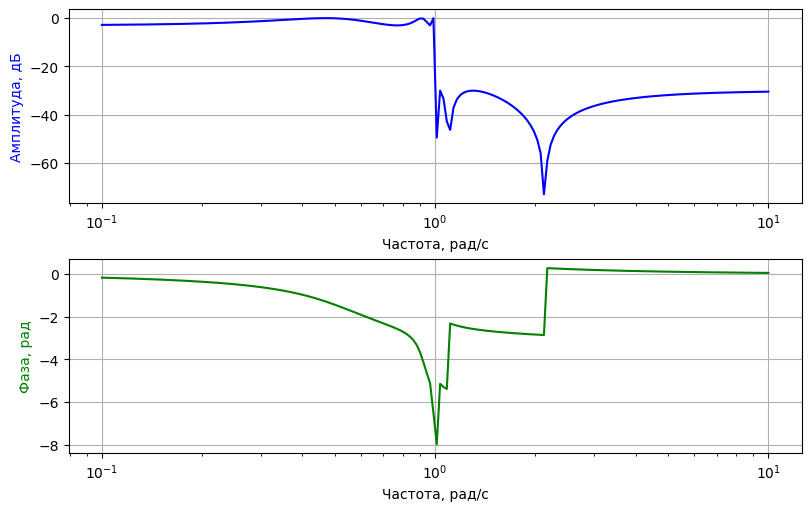

In [3]:
z, p, k = sp.ellipap(N=10, rp=3, rs=30)
b, a = sp.zpk2tf(z=z, p=p, k=k)
_ = sp.freqs(b=b, a=a, plot=FRPRDiagLog)

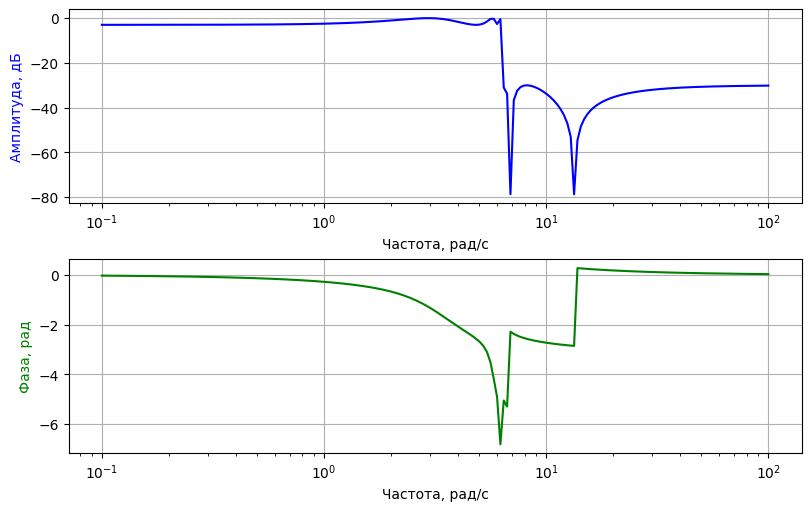

In [4]:
wo = 2*np.pi
bt, at = sp.lp2lp(b=b, a=a, wo=wo)
_ = sp.freqs(b=bt, a=at, plot=FRPRDiagLog)

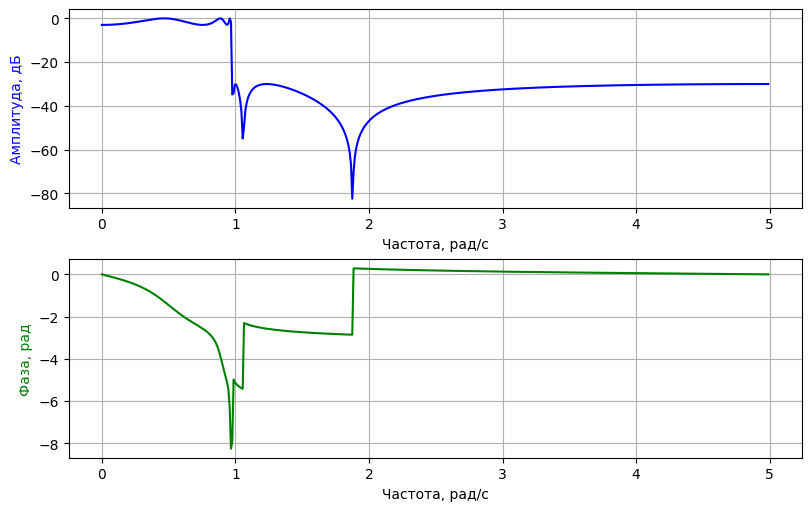

In [5]:
b1, a1 = sp.bilinear(b=bt, a=at, fs=10)
_ = sp.freqz(b=b1, a=a1, fs=10, plot=FRPRDiag)

##### Эллиптический полосовой фильтр

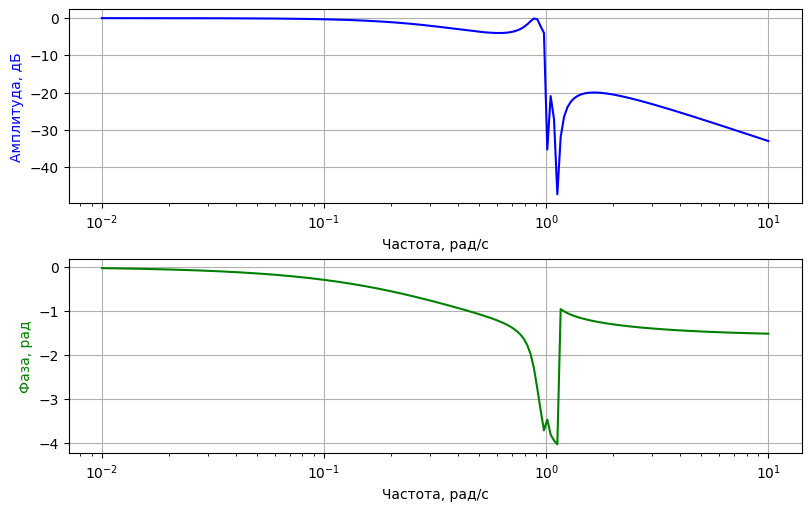

In [6]:
z, p, k = sp.ellipap(N=5, rp=4, rs=20)
b, a = sp.zpk2tf(z=z, p=p, k=k)
_ = sp.freqs(b=b, a=a, plot=FRPRDiagLog)

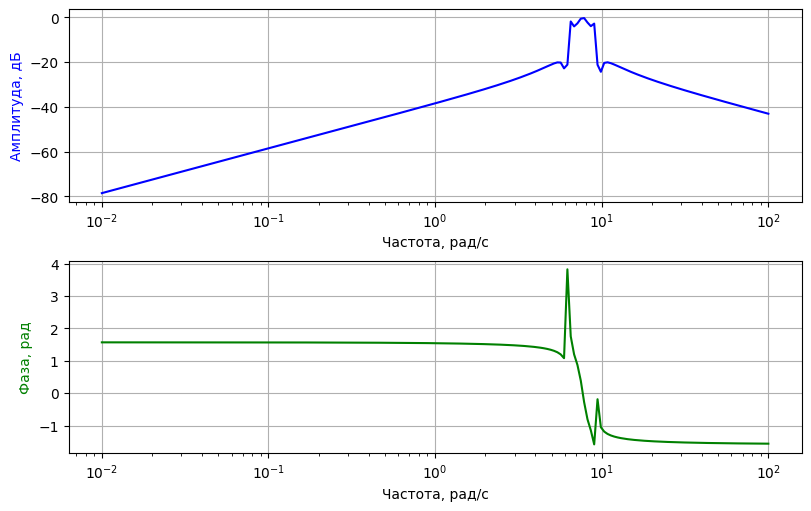

In [7]:
w1 = 2*np.pi
w2 = 3*np.pi
wo = np.sqrt(w1 * w2)
bw = w2 - w1

bt, at = sp.lp2bp(b=b, a=a, wo=wo, bw=bw)
_ = sp.freqs(b=bt, a=at, plot=FRPRDiagLog)

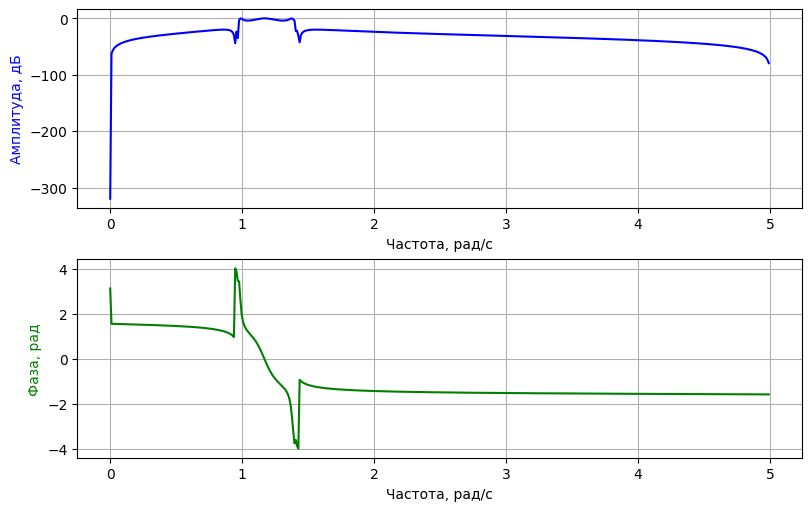

In [8]:
b1, a1 = sp.bilinear(b=bt, a=at, fs=10)
_ = sp.freqz(b=b1, a=a1, fs=10, plot=FRPRDiag)